In [1]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import shutil
import pandas 
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
dataFile = open("SquaredWeightedMatrix_V2.pkl", 'rb')
df = pickle.load(dataFile)
sentences = df['sentence'].to_numpy()
df = df.drop('sentence', axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.010662,-0.035473,-0.025611,0.012773,0.012705,-0.013702,-0.044721,-0.014689,0.008079,-0.019715,...,0.000213,0.007823,0.009612,-0.000590,0.053429,-0.004752,0.020467,-0.002624,-0.002532,0.004103
1,0.032876,-0.064865,0.002555,-0.024485,-0.038841,-0.059541,-0.050490,-0.019825,0.020571,0.081838,...,-0.081816,-0.052465,-0.076624,0.079542,-0.027362,0.025651,0.030915,-0.055276,-0.012482,-0.054227
2,-0.012443,-0.043223,0.003684,0.061463,0.061439,-0.020868,-0.003319,0.026243,0.000578,0.015451,...,-0.050059,-0.019349,0.005958,-0.031995,0.003124,-0.018602,0.051105,-0.035655,-0.003563,0.010372
3,-0.010030,-0.037978,-0.011218,0.008807,-0.021877,0.023408,-0.046795,-0.021728,0.020444,0.041620,...,-0.036526,-0.008280,-0.061070,0.056864,0.017233,0.017288,-0.024562,-0.033899,0.006795,-0.014894
4,-0.012179,-0.042267,-0.005794,-0.008853,0.028347,0.017203,0.012331,-0.025404,-0.001078,0.013851,...,-0.037676,-0.006599,-0.029074,0.009095,0.009272,0.006182,0.036618,-0.062798,0.040195,-0.012385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328174,0.026335,0.020373,0.014832,-0.034999,-0.063762,0.050719,-0.014787,-0.045425,0.006275,0.061068,...,-0.122978,0.027188,-0.071143,0.035290,0.036733,-0.004520,-0.076438,0.007928,0.011149,0.002426
2328175,-0.025625,-0.002937,0.047254,-0.018320,-0.026607,0.047867,0.075852,-0.009191,0.034472,-0.009027,...,-0.040321,-0.032845,0.000307,0.035450,-0.041924,-0.019874,0.047281,-0.051015,0.019052,0.014368
2328176,0.083419,0.107829,0.048048,-0.006419,0.012844,0.000735,0.047308,-0.020474,-0.059422,-0.040704,...,0.037175,-0.079425,-0.052241,0.014160,-0.038610,0.025602,0.034606,-0.122390,0.032792,-0.012604
2328177,0.049879,-0.024188,-0.006114,0.106212,-0.125119,0.037542,-0.021974,0.033815,0.054945,0.047913,...,-0.031136,-0.074802,0.004342,-0.007249,-0.028693,0.123375,0.053106,-0.067641,0.000954,-0.058904


In [3]:
sentences

array(['the gentleman i spoke with at lindbergh twr over the phone was very polite and seemed to be primarily concerned with the sudden surprise of my presence in his ata',
       '""approx 5 mi nw of the mission bay vor", while at an alt of approx 500\' over san, i proceeded to contact san apch ctl on the freq depicted on my current san tca chart',
       'w/o hesitation i quickly changed freqs to find the same routine with this next ctlr',
       ...,
       'on the digital atis," they need to clearly tell crews which approach to expect',
       '""multiple aircraft have landed over multiple years on 122.95 which is an fbo frequency on the field',
       'it is listed on the sectional as the first frequency'],
      dtype=object)

In [75]:
matrix = df.head(30000).to_numpy()
tsne = TSNE(n_components=2, perplexity=20, n_jobs=-1, verbose=1)
data_2d = tsne.fit_transform(matrix)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.010s...
[t-SNE] Computed neighbors for 30000 samples in 3.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [98]:
clustering = DBSCAN(eps=0.2, min_samples=5).fit(data_2d)

In [99]:
labels = np.ndarray.tolist(clustering.labels_)
for i in np.unique(labels):
    print(str(i) + ": "+ str(labels.count(i)))

-1: 29040
0: 7
1: 11
2: 6
3: 5
4: 5
5: 5
6: 6
7: 11
8: 5
9: 7
10: 7
11: 5
12: 5
13: 11
14: 10
15: 5
16: 7
17: 6
18: 5
19: 5
20: 9
21: 5
22: 6
23: 5
24: 6
25: 5
26: 5
27: 6
28: 7
29: 5
30: 5
31: 6
32: 6
33: 5
34: 5
35: 10
36: 6
37: 5
38: 5
39: 5
40: 7
41: 5
42: 5
43: 5
44: 5
45: 6
46: 5
47: 5
48: 6
49: 5
50: 6
51: 5
52: 6
53: 10
54: 5
55: 5
56: 12
57: 8
58: 6
59: 6
60: 7
61: 5
62: 6
63: 8
64: 5
65: 5
66: 5
67: 5
68: 5
69: 6
70: 6
71: 8
72: 5
73: 5
74: 7
75: 6
76: 8
77: 5
78: 7
79: 5
80: 5
81: 6
82: 5
83: 6
84: 5
85: 5
86: 5
87: 6
88: 6
89: 6
90: 8
91: 9
92: 5
93: 6
94: 6
95: 7
96: 5
97: 5
98: 5
99: 5
100: 6
101: 5
102: 5
103: 5
104: 6
105: 5
106: 5
107: 6
108: 5
109: 5
110: 6
111: 5
112: 7
113: 5
114: 5
115: 6
116: 5
117: 5
118: 6
119: 5
120: 5
121: 5
122: 6
123: 6
124: 5
125: 5
126: 5
127: 5
128: 5
129: 6
130: 6
131: 6
132: 6
133: 8
134: 5
135: 8
136: 6
137: 5
138: 5
139: 5
140: 5
141: 5
142: 5
143: 5
144: 5
145: 5
146: 5
147: 5
148: 5
149: 5
150: 7
151: 5
152: 5
153: 5
154: 5
155: 6
1

In [97]:
# silhouette_score(matrix, clustering.labels_)

In [103]:
for index,value in enumerate(labels):
    if value == 4:
        print(sentences[index] + '\n')

a few mins into the flt, i decided to do some touch and goes at opa-locka west arpt

in all we spent over an hour circling the field at 2000-3000' agl attempting to get the gear down

i decided to go to an unctled field so as not to endanger other acft there

we then entered one pattern at a lcl unctled arpt and shot 3 lndgs aiming for accuracy

after 1 hr airwork over san joaquin valley, decided to practice lndgs at tracy arpt (an uncontrolled field)



In [50]:
def save_clusters(labels, sentences): 
    
    for index,value in enumerate(labels):
        filename = "./DBSCAN_Clusters/Cluster" + str(value) + ".txt"
        out = open(filename, 'a')
        out.write(sentences[index] + '\n\n')
        out.close()

In [51]:
try:
    os.mkdir('DBSCAN_Clusters')
except:
    shutil.rmtree('./DBSCAN_Clusters')
    os.mkdir('DBSCAN_Clusters')
save_clusters(labels, sentences)

In [104]:
# plt.rcParams['axes.facecolor'] = (0.78, 0.95, 0.61)
plt.rcParams['axes.facecolor'] = (0, 0, 0)
plt.rcParams['axes.grid'] = False

In [105]:
data_2d_display = data_2d.tolist()
drop_indexes = []
for i in range(len(data_2d)):
    if labels[i] == -1: drop_indexes.append(i)
    data_2d_display[i].append(labels[i])
data_2d_display = pandas.DataFrame(data_2d_display, columns=['x', 'y', 'cluster',])
data_2d_display = data_2d_display.drop(drop_indexes)


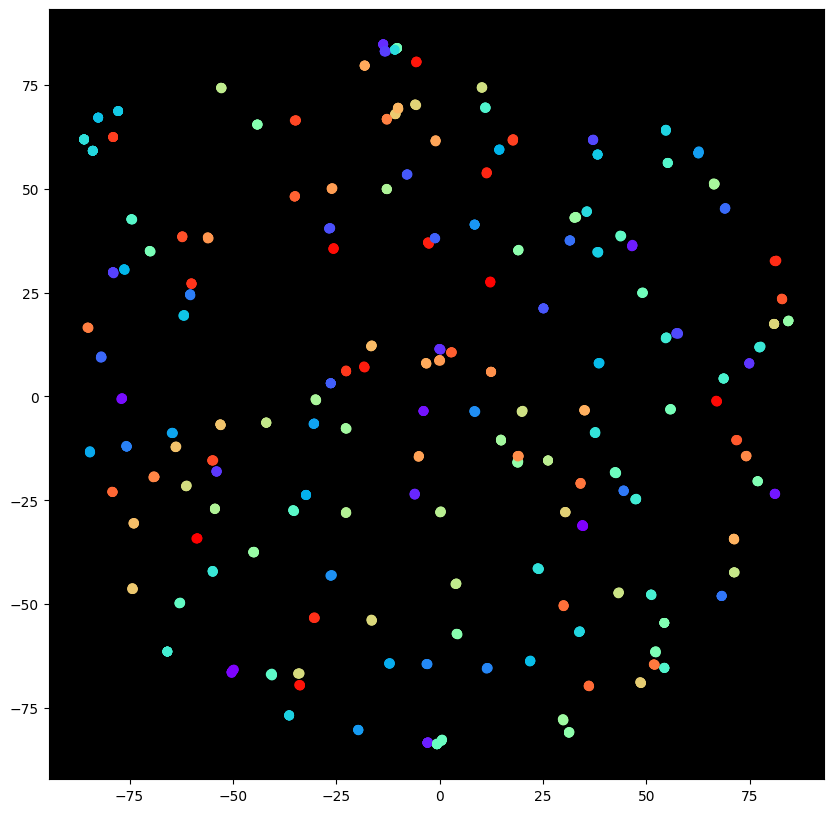

In [106]:
plt.figure(figsize=(10, 10))
plt.scatter(data_2d_display['x'], data_2d_display['y'], c=data_2d_display['cluster'], cmap='rainbow')
plt.show()

In [107]:
data_2d

array([[ -7.661874  ,  29.820238  ],
       [ 19.389109  ,  46.871418  ],
       [  0.26064742,  46.187283  ],
       ...,
       [ -2.2244644 , -28.593592  ],
       [ 72.358406  , -44.54683   ],
       [-78.97239   ,  62.44255   ]], dtype=float32)

In [29]:
# perplexity = np.arange(5, 305, 5)
# divergence = []

# for i in perplexity:
    # model = TSNE(n_components=2, init="pca", perplexity=i)
    # reduced = model.fit_transform(matrix)
    # divergence.append(model.kl_divergence_)

In [30]:
# plt.plot(perplexity, divergence)